In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('tendulkar_ODI.csv')
df.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [5]:
df.isnull().sum()

Unnamed: 0    0
Runs          0
Mins          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [6]:
df.dtypes

Unnamed: 0     int64
Runs          object
Mins          object
BF            object
4s            object
6s            object
SR            object
Pos           object
Dismissal     object
Inns          object
Opposition    object
Ground        object
Start Date    object
dtype: object

In [7]:
df[['Runs','Mins','4s']] = df[['Runs','Mins','4s']].map(lambda x: x.replace('TDNB','0').replace('DNB','0').replace('*','0').replace('-','0'))
df['Runs'] = df['Runs'].astype(int)
df['Mins'] = df['Mins'].astype(int)
df['4s'] = df['4s'].astype(int)
df.head(100)

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,0,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,44,57,43,10,0,102.32,1,caught,1,v West Indies,Port of Spain,26-Apr-97
96,97,650,111,70,7,0,92.85,1,not out,2,v West Indies,Port of Spain,27-Apr-97
97,98,9,22,15,1,0,60,1,bowled,2,v West Indies,Kingstown,30-Apr-97
98,99,1,17,11,0,0,9.09,1,caught,1,v West Indies,Bridgetown,3-May-97


<Axes: xlabel='Run Bucket'>

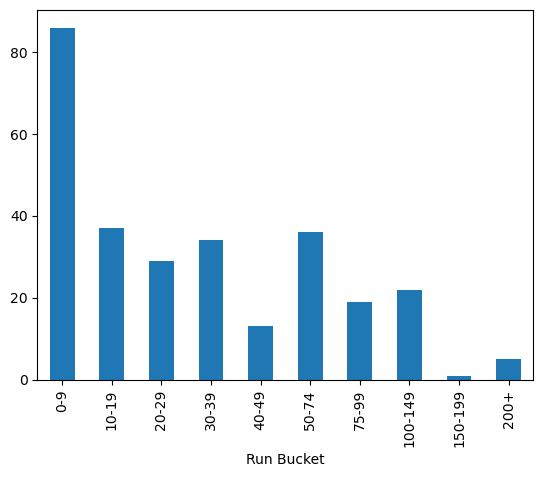

In [8]:

# Define bins (score buckets), you can adjust based on data range
bins = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 700]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-74', '75-99', '100-149', '150-199', '200+']

# Create a new column for the run bucket
df['Run Bucket'] = pd.cut(df['Runs'], bins=bins, labels=labels, right=False)

# Count frequencies in each bucket
bucket_counts = df['Run Bucket'].value_counts().sort_index()

bucket_counts.plot.bar()
# Plot
# plt.figure(figsize=(10, 6))
# bucket_counts.plot(kind='bar', color='skyblue', edgecolor='black')
# plt.title('Distribution of Runs Scored')
# plt.xlabel('Runs (Bucketed)')
# plt.ylabel('Number of Innings')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# # Identify the most frequent bucket
# most_frequent_bucket = bucket_counts.idxmax()
# most_frequent_count = bucket_counts.max()
# print(f"Most frequent run bucket: {most_frequent_bucket} ({most_frequent_count} innings)")

<Axes: ylabel='Frequency'>

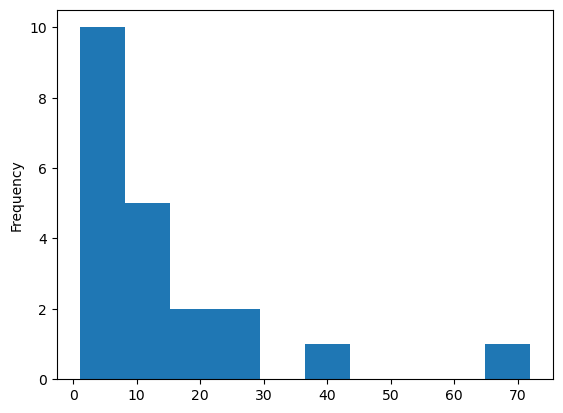

In [30]:
# Count frequencies in each bucket
fours_counts = df['4s'].value_counts().sort_index()

fours_counts.plot.hist()

In [32]:
df_popularity = pd.read_csv('popularity.csv')
df_popularity.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [63]:
df_popularity.columns = df_popularity.columns.str.strip()

df_popularity.shares.median()

1400.0